In [71]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

In [49]:
x = np.load('../train.npy/X_train.npy')
Y_train = np.load('../train.npy/y_train.npy')
X_train = (x-np.min(x))/(np.max(x)-np.min(x))
xt = np.load('../test.npy/X_Test.npy')
Y_test = np.load('../test.npy/Y_Test.npy')
X_test = (xt-np.min(xt))/(np.max(xt)-np.min(xt))

In [52]:
Y = np.concatenate((Y_train, Y_test))
X = np.concatenate((X_train, X_test))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [54]:
X_test.shape

(394, 20)

In [60]:
y_temp = Y_train[ : ,0]
np.count_nonzero(Y_test[ : ,0])

12

In [61]:
clf = MLPClassifier(solver = 'lbfgs').fit(X_train, Y_train)

C:\Users\jonat\Documents\GraphAnalytics\gaenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [62]:
res = clf.predict(X_test)

In [63]:
y_test = Y_test[ : ,0]
clf.score(X_test, Y_test)

0.17258883248730963

In [64]:
np.count_nonzero(res)

326

In [42]:
clf.classes_

array([0., 1.])

In [67]:
mlp = MLPClassifier(solver = 'adam', )
chains = [ClassifierChain(mlp, order="random", random_state=i) for i in range(10)]
for chain in chains:
    chain.fit(X_train, Y_train)


C:\Users\jonat\Documents\GraphAnalytics\gaenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jonat\Documents\GraphAnalytics\gaenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jonat\Documents\GraphAnalytics\gaenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jonat\Documents\GraphAnalytics\gaenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

C:\Users\jonat\Documents\GraphAnalytics\gaenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


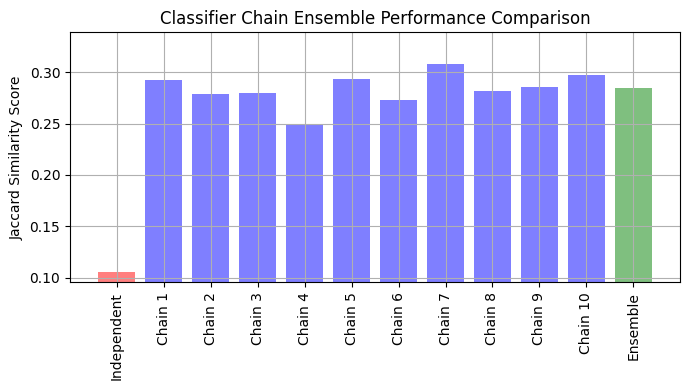

In [72]:
ovr = OneVsRestClassifier(mlp)
ovr.fit(X_train, Y_train)
Y_pred_ovr = ovr.predict(X_test)
ovr_jaccard_score = jaccard_score(Y_test, Y_pred_ovr, average="samples")

Y_pred_chains = np.array([chain.predict(X_test) for chain in chains])
chain_jaccard_scores = [
    jaccard_score(Y_test, Y_pred_chain >= 0.5, average="samples")
    for Y_pred_chain in Y_pred_chains
]

Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_score(
    Y_test, Y_pred_ensemble >= 0.5, average="samples"
)

model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

model_names = (
    "Independent",
    "Chain 1",
    "Chain 2",
    "Chain 3",
    "Chain 4",
    "Chain 5",
    "Chain 6",
    "Chain 7",
    "Chain 8",
    "Chain 9",
    "Chain 10",
    "Ensemble",
)

x_pos = np.arange(len(model_names))

# Plot the Jaccard similarity scores for the independent model, each of the
# chains, and the ensemble (note that the vertical axis on this plot does
# not begin at 0).

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title("Classifier Chain Ensemble Performance Comparison")
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation="vertical")
ax.set_ylabel("Jaccard Similarity Score")
ax.set_ylim([min(model_scores) * 0.9, max(model_scores) * 1.1])
colors = ["r"] + ["b"] * len(chain_jaccard_scores) + ["g"]
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()